<a href="https://colab.research.google.com/github/MashaKubyshina/Learning_to_code/blob/master/Distribution_and_x_square_of_coin_tossing_Stepik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Coin tossing and calculation of chi-squared

import random
from math import sqrt

def distance_chi_square_from_toss_coin():
    heads = 0
    tails = 0
    # toss the coin 60 times
    for i in range(60):
        if random.randint(0,1):
            heads += 1
        else:
            tails += 1
    # Calculate chi-squared (Pearson)
    # ((O1 - E1)|sqrt(E1))^2 + ... + ((On - En)|sqrt(En))^2
    return (
        (heads-30)**2/30 + (tails-30)**2/30
    )

In [3]:
# repeat 1000 times
# the coin is tossed 60 times in each

list_of_chi_square = []
for i in range(10000):
    list_of_chi_square.append(distance_chi_square_from_toss_coin())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


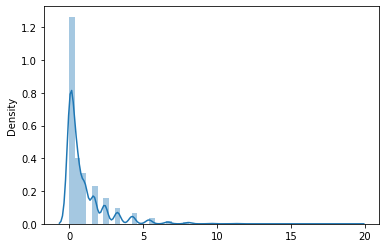

In [4]:
# distribution

import seaborn as sns

sns.distplot(list_of_chi_square);

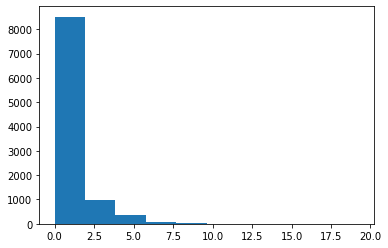

In [5]:
import matplotlib.pyplot as plt

plt.hist(list_of_chi_square);

In [3]:
# Pearson's Chi-squared test with Yates' continuity correction

from scipy import stats
observed_array = [ [15, 9], [11, 6] ]
chi2_value, p_value, df_value, expected_array = stats.chi2_contingency(observed_array, correction=True) 
# 'correction=True' - Yates' correction
print(f'Chi-squared = {chi2_value:.3f}, p-value = {p_value:.3f}, df = {df_value}')
print(f'Expected values:\n{expected_array}')

Chi-squared = 0.034, p-value = 0.854, df = 1
Expected values:
[[15.2195122  8.7804878]
 [10.7804878  6.2195122]]


In [5]:
# Pearson's Chi-squared test with Yates' continuity correction

from scipy.stats import chi2_contingency

observed_values = [[15, 9], [11, 6]]
chi2, p_value, ddof, expected = chi2_contingency(observed_values)

print(ddof)  # degrees of freedom
1

print(expected)

print(chi2)

1
[[15.2195122  8.7804878]
 [10.7804878  6.2195122]]
0.0340764831573656


In [15]:
from scipy.stats import chi2_contingency
  
# defining the table
data = [[15, 9], [11, 6]]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
threshold = 0.05
print("p value is " + str(p))
if p <= threshold:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

print("Expected outcome", expected)
print("Degrees of freedom:",dof)
print("Chi-squared:",stat)

p value is 0.8535442239746989
Independent (H0 holds true)
Expected outcome [[15.2195122  8.7804878]
 [10.7804878  6.2195122]]
Degrees of freedom: 1
Chi-squared: 0.0340764831573656


In [16]:
from scipy.stats import chi2_contingency
  
# defining the table
data = [[20, 15], [11, 12],[7,9]]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
threshold = 0.05
print("p value is " + str(p))
if p <= threshold:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

print("Expected outcome", expected)
print("Degrees of freedom:",dof)
print("Chi-squared:",stat)

p value is 0.6205162173513055
Independent (H0 holds true)
Expected outcome [[17.97297297 17.02702703]
 [11.81081081 11.18918919]
 [ 8.21621622  7.78378378]]
Degrees of freedom: 2
Chi-squared: 0.9544070774762996


x-squared = 5.57719298245614
p-value = 0.018195864430772903
df = 1


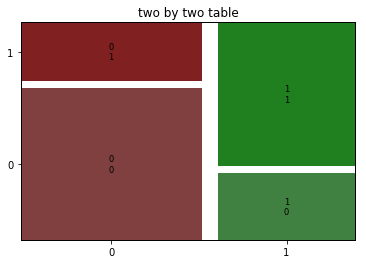

In [25]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

observed = np.array([[18, 7], [6, 13]])
chi2, p, df, expected = stats.chi2_contingency(observed)
print('x-squared =', chi2)
print('p-value =', p)
print('df =', df)

mosaic(observed, gap=0.05, title='two by two table')
plt.show()

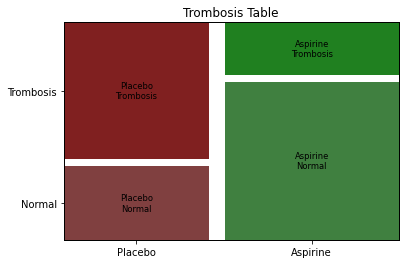

Placebo   Normal        7
          Trombosis    13
Aspirine  Normal       18
          Trombosis     6
dtype: int64


In [33]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.patches as mpatches
import numpy as np

cure = ['Placebo', 'Aspirine']
effect = ['Normal', 'Trombosis']
idx = pd.MultiIndex.from_tuples(product(cure, effect))
data = pd.Series([7, 13, 18, 6], index=idx)
mosaic(data, gap=0.05, title='Trombosis Table')
plt.show()
print(data)